# Setup

In [ ]:
!pip install -qU google-genai

The code is a shell command that installs the Google Generative AI Python library. Let's break it down:

- `!` at the beginning indicates this is a shell command being run from within a Python environment (like a Jupyter notebook)
- `pip` is Python's package installer
- `install` is the command to add new packages
- `-qU` contains two flags:
  - `-q` means "quiet mode" (minimal output during installation)
  - `-U` means "upgrade" (install the newest version, even if already installed)
- `google-genai` is the package name for Google's generative AI library, which provides access to Google's AI models like Gemini

This command will quietly install / update the Google Generative AI library, allowing you to use Google's AI models in your Python code.

In [ ]:

from PIL import Image
from io import BytesIO
from IPython.display import display
from google.colab import userdata
from google import genai
from google.genai import types

This code imports various Python libraries and modules needed for working with images, data handling, and Google's generative AI:

- `from PIL import Image`: Imports the Image class from the Python Imaging Library (PIL/Pillow) for image processing and manipulation.

- `from io import BytesIO`: Imports BytesIO class, which creates an in-memory binary stream, useful for handling image data without writing to disk.

- `from IPython.display import display`: Imports the display function from IPython, which renders objects like images in notebook environments.

- `from google.colab import userdata`: Imports the userdata module from Google Colab, allowing access to stored user data like API keys.

- `from google import genai`: Imports Google's Generative AI library, the main interface for working with Google's AI models.

- `from google.genai import types`: Imports specific data types from the Google Generative AI library that are needed for proper API interactions.

These imports set up the environment to work with images and Google's AI models in a Jupyter or Colab notebook.

In [ ]:
class CFG:
  model = "gemini-2.0-flash-exp-image-generation"

This code defines a configuration class named `CFG` that specifies which AI model to use.

The class has one attribute:
- `model`: Set to "gemini-2.0-flash-exp-image-generation", which is a specific version of Google's Gemini model.

By creating this configuration class, the code centralizes model selection, making it easier to switch models by changing just this one line rather than updating model references throughout the code.

In [ ]:
client = genai.Client(api_key = userdata.get("GOOGLE_API_KEY"))

This line sets up a client connection to Google's Generative AI API service.

The code creates a new client instance by calling `genai.Client()` and assigns it to the variable `client`. This client will be used to communicate with Google's AI services.

The constructor takes an `api_key` parameter, which is being retrieved from Colab's secure storage using `userdata.get("GOOGLE_API_KEY")`. This approach keeps the API key secure by not hardcoding it directly in the notebook.

The API key is necessary for authentication - it tells Google's servers who is making the request and ensures the user has permission to access the AI services. Without a valid API key, requests to the API would be rejected.

# Functions

In [ ]:

def display_response(response, filename_to_save=None):
    for part in response.candidates[0].content.parts:
        if part.text is not None:
            print(part.text)
        elif part.inline_data is not None:
            image = Image.open(BytesIO(part.inline_data.data))
            if filename_to_save:
                image.save(filename_to_save)
            image.thumbnail((700, 700))
            display(image)


This function processes and displays responses from the AI model, handling both text and image outputs:

1. It takes two parameters:
   - `response`: The response object returned from the AI model
   - `filename_to_save`: An optional parameter for saving any images (defaults to None)

2. It loops through each part in the first candidate's content:
   - `response.candidates[0]` gets the first response candidate
   - `.content.parts` accesses the different components of that response

3. For each part, it checks the content type:
   - If the part contains text (`part.text is not None`), it prints the text
   - If the part contains image data (`part.inline_data is not None`), it:
     - Converts the binary data to an image using PIL's Image.open() and BytesIO
     - Saves the image to disk if a filename was provided
     - Resizes the image to fit within 700×700 pixels using thumbnail()
     - Displays the image in the notebook with IPython's display() function

This function simplifies working with multimodal AI responses that contain both text and images.

# Take 1: fast editing with chat

Paraphrase: Use a chat if you want the model to remember the conversation and previous edits. The model can use this context when creating new images, and allows you to quickly iterate on image editing.

In [ ]:

chat = client.chats.create(
    model = CFG.model,
    config = types.GenerateContentConfig(
        response_modalities=['Text', 'Image']
    )
)

This code creates a new chat session for interacting with the Gemini AI model.

It initializes a chat instance by calling `client.chats.create()` and stores it in the variable `chat`. This session will maintain context throughout a conversation with the AI.

The function takes two key parameters:

1. `model`: Specifies which AI model to use by referencing the model name from the CFG class (gemini-2.0-flash-exp-image-generation)

2. `config`: Configures how the model should respond using a GenerateContentConfig object with:
   - `response_modalities=['Text', 'Image']`: Instructs the model to generate both text and images in its responses

This setup allows the user to have an ongoing conversation with the AI model where the AI can respond with a combination of text explanations and generated images.

In [ ]:


response = chat.send_message("Create a black and white image of a female supermodel on the catwalk, Frank Miller graphic novel")


This line sends a message to the previously created Gemini AI model chat session and captures the response.

The code:
1. Uses the `chat` object created earlier to maintain conversation context
2. Calls `send_message()` to send a prompt to the AI model
3. Stores the model's response in the variable `response`

The prompt text instructs the AI to "Create a black and white image of a female supermodel on the catwalk, Frank Miller graphic novel" - this tells the model to generate an image with specific characteristics:
- A female supermodel
- On a fashion runway/catwalk
- In black and white
- In the distinctive artistic style of Frank Miller (a comic book artist known for high-contrast, noir-influenced black and white illustrations)

The model will process this request and return a response containing the generated image along with any explanatory text.

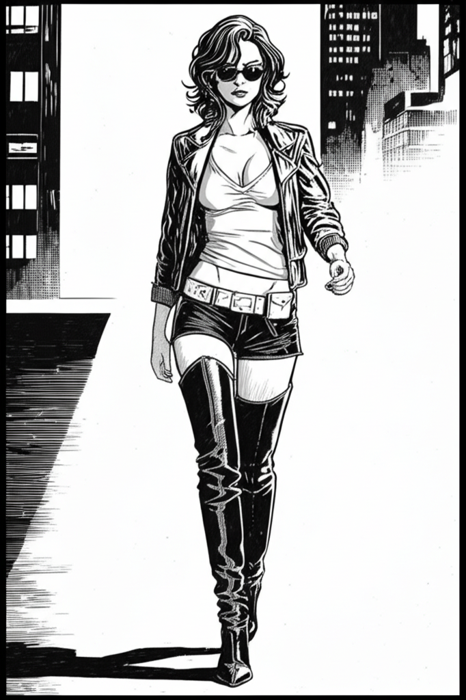

In [ ]:

display_response(response, "model1.png")


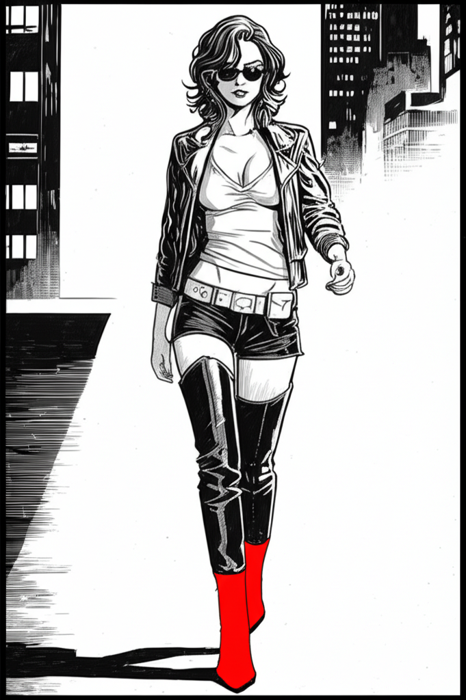

In [ ]:

response = chat.send_message("make her shoes red ")

display_response(response, "model2.png")


This code sends a follow-up request to the AI model and then displays the result.

The first line:
- Uses the existing `chat` object (which maintains conversation context)
- Calls `send_message()` with the prompt "make her shoes red"
- This instructs the AI to modify the previously generated image by changing the shoes to red color
- Stores the response in the variable `response`

The second line:
- Calls the `display_response()` function defined earlier
- Passes the model's response as the first parameter
- Provides "model2.png" as the second parameter, which means:
  - The image will be displayed in the notebook
  - The image will also be saved to disk as "model2.png"

Since the chat session maintains context, the AI understands that "her" refers to the supermodel from the previous prompt, and knows to modify that image rather than creating an entirely new one.

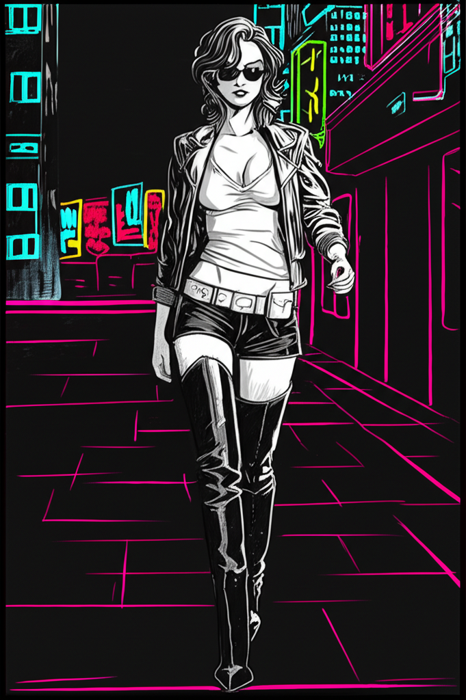

In [ ]:
response = chat.send_message("change her surrounding to a street at night, with neon lights around her")

display_response(response, "model3.png")

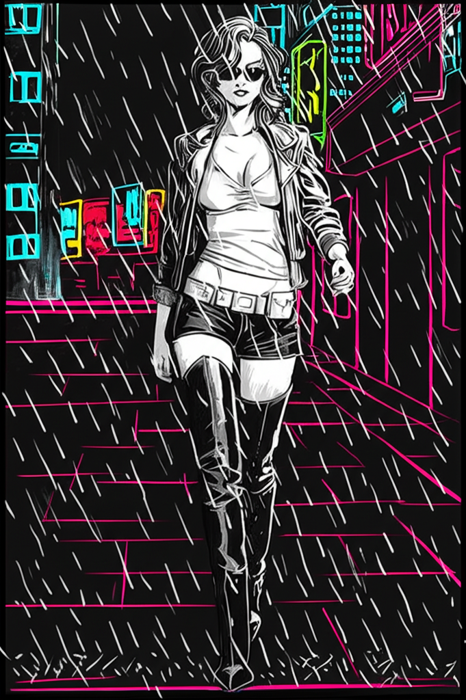

In [ ]:
response = chat.send_message("add some light rain")

display_response(response, "model4.png")

# Take 2: one-off calls

for isolated image creation or edits, where chat history is not required and precise prompt control is preferred.

In [ ]:
prompt_with_image = [
    "make it add night, add bright neon lights",
    Image.open('model2.png')
]

response = client.models.generate_content(
    model = CFG.model,
    contents = prompt_with_image,
    config=types.GenerateContentConfig(
        response_modalities=['Text', 'Image']
    )
)

This code sends another modification request to the AI model, but uses a different approach by including the previous image in the prompt.

The first part creates a list called `prompt_with_image` that contains two elements:
- A text instruction: "make it add night, add bright neon lights"
- The image from the previous generation, loaded from the file 'model2.png'

The second part makes a direct API call to generate content instead of using the chat interface:
- Uses `client.models.generate_content()` instead of the chat.send_message() method
- Specifies the same model from CFG.model (gemini-2.0-flash-exp-image-generation)
- Passes the combined text+image prompt as the `contents` parameter
- Configures the response to include both text and images

This approach differs from the previous code because it:
1. Sends both text and image data together as input
2. Uses a direct API call rather than the chat session
3. Makes a fresh request instead of relying on conversation context

The AI will process this request by taking the existing image, adding a nighttime setting, and incorporating bright neon lighting effects.

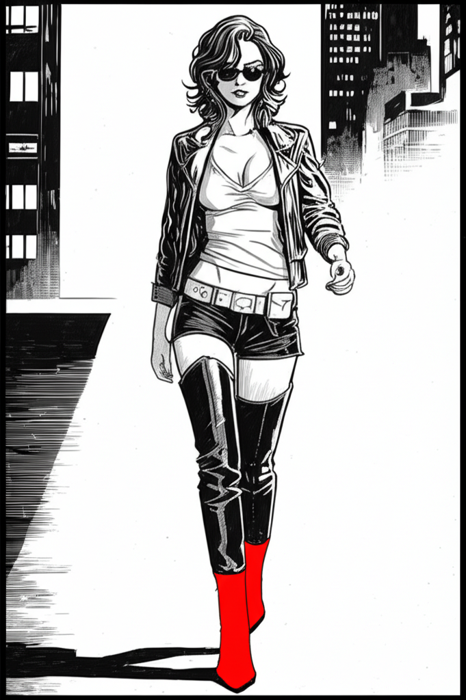

In [ ]:
# OG
img = Image.open('model2.png')  # the original one we saved earlier
img.thumbnail((700, 700))
display(img)

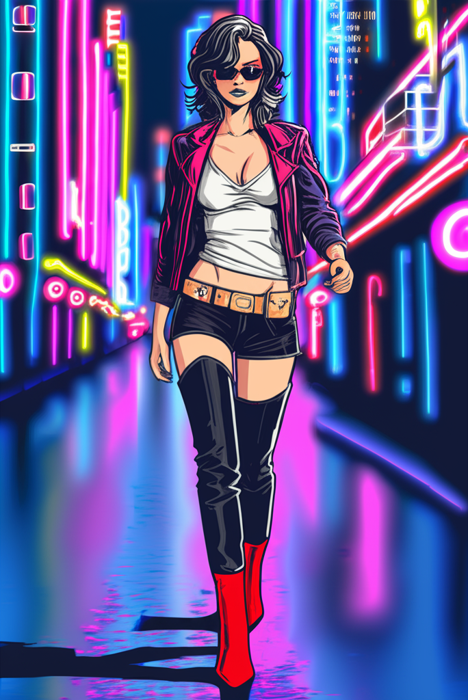

In [ ]:
display_response(response)